In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
sns.set_style("darkgrid")

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### View the data

In [3]:
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')

df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


### Clean the data

In [4]:
df.columns = ['city', 'population', 'violent', 'murder', 'rape1', 'rape2', 'robbery', 
              'ag_aslt', 'property', 'burglary', 'larce-th', 'motor_th', 'arson3']

df.head()

,city,population,violent,murder,rape1,rape2,robbery,ag_aslt,property,burglary,larce-th,motor_th,arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


### Let's see if there is any relationship

Check to see if murders or robberies relate to property at all

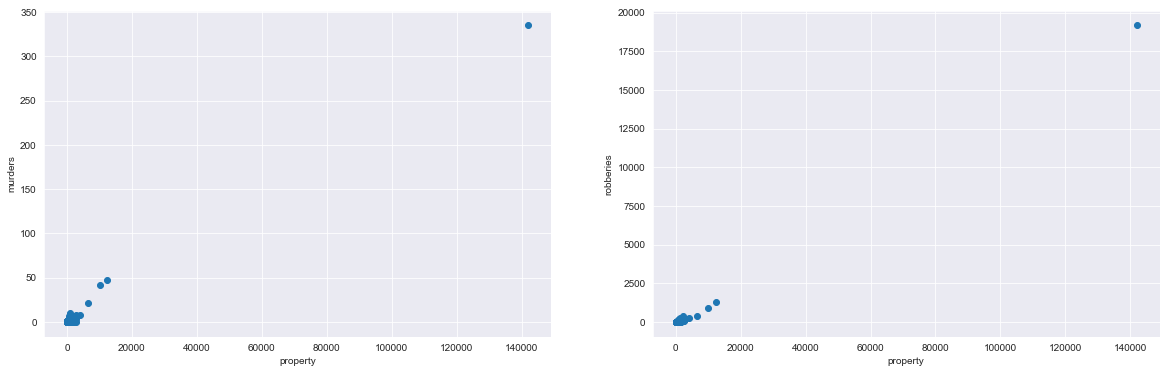

In [5]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.scatter(x='property', y='murder', data=df)
plt.xlabel('property')
plt.ylabel('murders')
plt.subplot(1,2,2)
plt.scatter(x='property', y='robbery', data=df)
plt.xlabel('property')
plt.ylabel('robberies')
plt.show()

### Let's remove some outliers

In [6]:
df.sort_values('population', ascending=False).head()

,city,population,violent,murder,rape1,rape2,robbery,ag_aslt,property,burglary,larce-th,motor_th,arson3
216,New York,8396126.000,52384.000,335.000,nan,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,nan
35,Buffalo,258789.000,3249.000,47.000,nan,145.000,1322.000,1735.000,12491.000,3458.000,8076.000,957.000,nan
272,Rochester,210562.000,2107.000,42.000,nan,92.000,918.000,1055.000,10051.000,2587.000,6855.000,609.000,132.000
346,Yonkers,199134.000,1036.000,6.000,nan,25.000,390.000,615.000,2368.000,470.000,1662.000,236.000,10.000
310,Syracuse,143834.000,1192.000,21.000,nan,75.000,400.000,696.000,6473.000,1781.000,4298.000,394.000,57.000


In [7]:
df.describe()

,population,violent,murder,rape1,rape2,robbery,ag_aslt,property,burglary,larce-th,motor_th,arson3
count,348.000,348.000,348.000,0.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,187.000
mean,40037.632,201.595,1.566,nan,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
std,450037.368,2815.269,18.304,nan,60.425,1031.033,1706.132,7659.725,924.949,6346.054,403.424,10.693
min,526.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3003.000,2.000,0.000,nan,0.000,0.000,1.000,40.500,6.000,31.000,0.000,0.000
50%,7233.500,6.000,0.000,nan,0.000,1.000,4.000,112.500,17.500,94.000,2.000,0.000
75%,18427.500,22.000,0.000,nan,2.000,5.000,14.000,341.000,51.250,287.250,7.000,1.000
max,8396126.000,52384.000,335.000,nan,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000


In [8]:
df = df.drop(216)

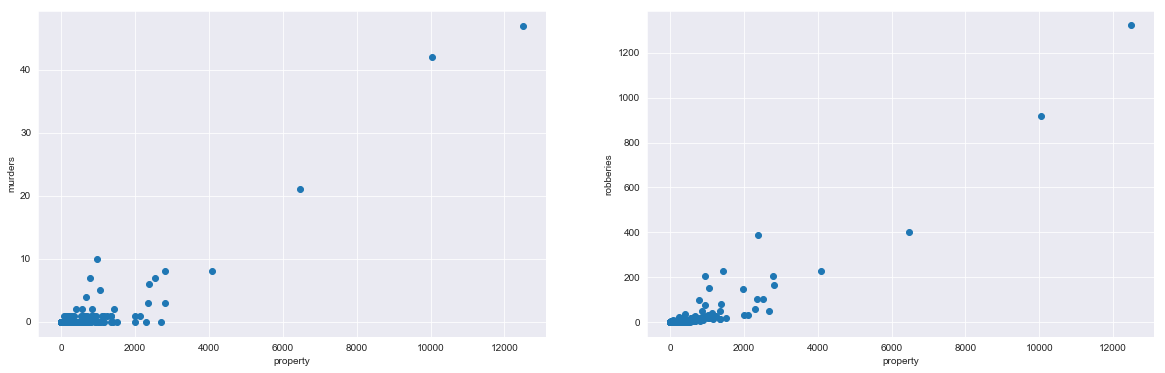

In [9]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.scatter(x='property', y='murder', data=df)
plt.xlabel('property')
plt.ylabel('murders')
plt.subplot(1,2,2)
plt.scatter(x='property', y='robbery', data=df)
plt.xlabel('property')
plt.ylabel('robberies')
plt.show()

### Drop even more outliers

In [10]:
df = df.drop(35)

In [11]:
df = df.drop(272)

In [12]:
df = df.drop(346)

In [13]:
df = df.drop(310)

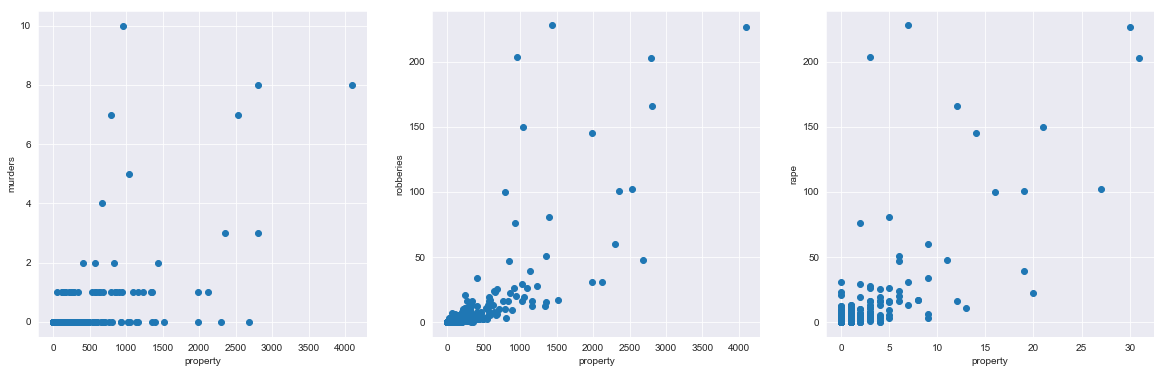

In [14]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.scatter(x='property', y='murder', data=df)
plt.xlabel('property')
plt.ylabel('murders')
plt.subplot(1,3,2)
plt.scatter(x='property', y='robbery', data=df)
plt.xlabel('property')
plt.ylabel('robberies')
plt.subplot(1,3,3)
plt.scatter(x='rape2', y='robbery', data=df)
plt.xlabel('property')
plt.ylabel('rape')
plt.show()

In [15]:
df.loc[df['property']>3500]

,city,population,violent,murder,rape1,rape2,robbery,ag_aslt,property,burglary,larce-th,motor_th,arson3
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan


In [16]:
df = df.drop(3)

### Let's see if we can find a linear relationship in some other features

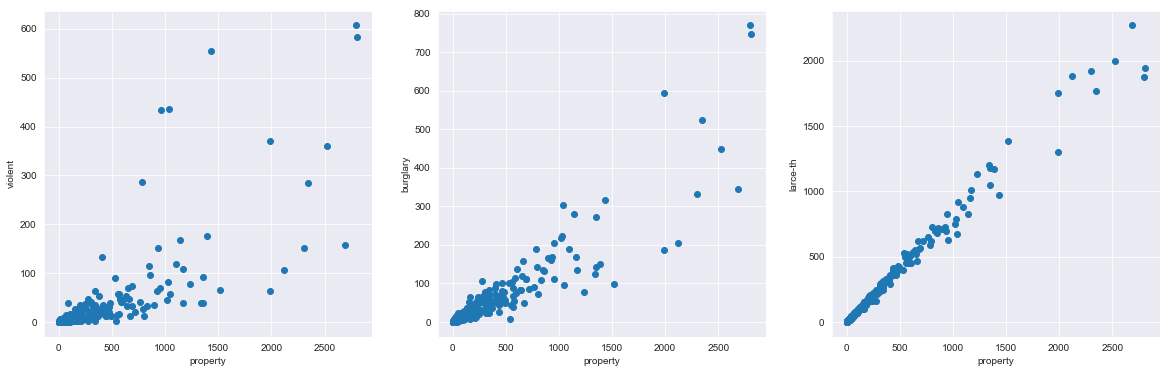

In [17]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.scatter(x='property', y='violent', data=df)
plt.xlabel('property')
plt.ylabel('violent')
plt.subplot(1,3,2)
plt.scatter(x='property', y='burglary', data=df)
plt.xlabel('property')
plt.ylabel('burglary')
plt.subplot(1,3,3)
plt.scatter(x='property', y='larce-th', data=df)
plt.xlabel('property')
plt.ylabel('larce-th')
plt.show()

In [18]:
df.columns

Index(['city', 'population', 'violent', 'murder', 'rape1', 'rape2', 'robbery',
       'ag_aslt', 'property', 'burglary', 'larce-th', 'motor_th', 'arson3'],
      dtype='object')

In [19]:
df2 = df[['population','murder','robbery', 'property', 'violent', 'burglary', 'larce-th', 'ag_aslt', 'rape2']].dropna()


df2['populationsq'] = df2['population'] * df2['population']

df2['murder'] = df2.loc[df2['murder']>0, 'murder'] = 1

df2['robbery'] = df2.loc[df2['robbery']>0, 'robbery'] = 1

df2 = df2.rename(columns={'larce-th': 'larce'})


df2.describe()

,population,murder,robbery,property,violent,burglary,larce,ag_aslt,rape2,populationsq
count,342.000,342.000,342.000,342.000,342.000,342.000,342.000,342.000,342.000,342.000
mean,13528.348,1.000,1.000,287.670,27.474,46.909,232.798,16.974,1.643,470294375.652
std,16974.117,0.000,0.000,460.277,74.971,90.645,365.363,45.015,3.768,1329035238.060
min,526.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,276676.000
25%,2979.750,1.000,1.000,39.000,2.000,6.000,31.000,1.000,0.000,8878919.250
50%,7074.500,1.000,1.000,111.000,6.000,17.000,92.000,4.000,0.000,50049200.500
75%,17611.250,1.000,1.000,331.750,20.000,49.000,272.500,13.000,2.000,310156870.750
max,118296.000,1.000,1.000,2807.000,607.000,769.000,2271.000,403.000,31.000,13993943616.000


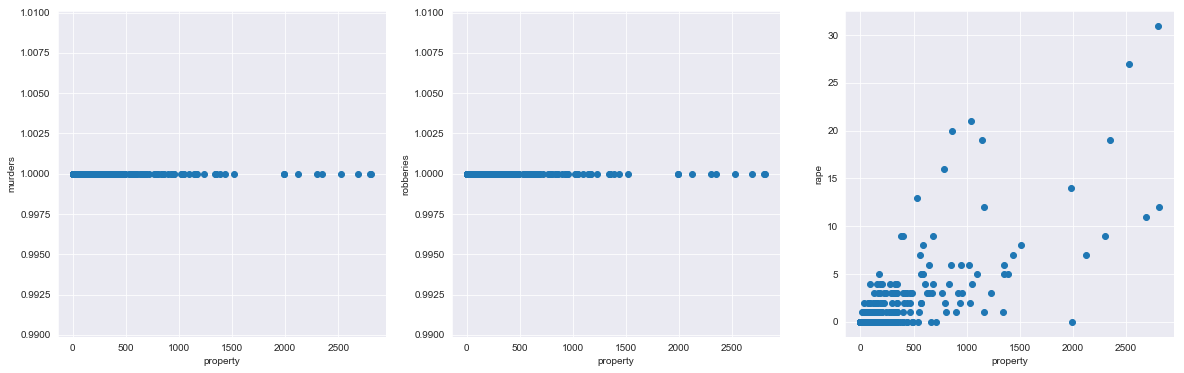

In [20]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.scatter(x='property', y='murder', data=df2)
plt.xlabel('property')
plt.ylabel('murders')
plt.subplot(1,3,2)
plt.scatter(x='property', y='robbery', data=df2)
plt.xlabel('property')
plt.ylabel('robberies')
plt.subplot(1,3,3)
plt.scatter(x='property', y='rape2', data=df2)
plt.xlabel('property')
plt.ylabel('rape')
plt.show()

### Apply some PCA to combine

Based on the data, rape, murder and robberies happen less often and seem to have a less linear relationship to property. Let's combine them together to see if we can still use these features.

In [53]:
from sklearn.preprocessing import StandardScaler
features = ['murder', 'robbery', 'rape2', 'ag_aslt', 'population', 'violent', 'larce']

# Separating out the features
x = df2.loc[:, features].values
# Separating out the target
y = df2.loc[:,['property']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1','pc2','pc3'])

In [55]:
model_df = pd.concat([principalDf, df2], axis = 1).dropna().reset_index()
model_df.head()

,index,pc1,pc2,pc3,population,murder,robbery,property,violent,burglary,larce,ag_aslt,rape2,populationsq
0,0,-1.095,-0.333,0.036,1861.000,1.000,1.000,12.000,0.000,2.000,10.000,0.000,0.000,3463321.000
1,1,-1.016,-0.334,0.079,2577.000,1.000,1.000,24.000,3.000,3.000,20.000,3.000,0.000,6640929.000
2,2,-1.016,-0.329,0.084,2846.000,1.000,1.000,16.000,3.000,1.000,15.000,3.000,0.000,8099716.000
3,4,-0.958,-0.256,0.093,6388.000,1.000,1.000,223.000,23.000,53.000,165.000,16.000,3.000,40806544.000
4,5,-1.047,-0.378,0.074,4089.000,1.000,1.000,46.000,5.000,10.000,36.000,2.000,0.000,16719921.000


In [56]:
pca.explained_variance_ratio_

array([0.77811845, 0.13852564, 0.06006512])

### Model using murder, robbery and rape as features

Our original idea was to use these three, let's see how they work.

In [58]:
# to split a training and test sample
from sklearn.model_selection import train_test_split

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = model_df['property'].values.reshape(-1, 1)
X = model_df[['pc1','pc2', 'pc3','populationsq']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)
regr.fit(x_train, y_train)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x_train, y_train))


Coefficients: 
 [[-3.95636827e+00 -1.45626068e+01 -9.92732377e+00  3.58486146e-07]]

Intercept: 
 [134.00762228]

R-squared:
0.6709717095136839


The R score is decent but the intercept is much too high. Lets see if we can achieve a better score with different features.

### Try with some different features & add the PCA in

In [96]:
# to split a training and test sample
from sklearn.model_selection import train_test_split

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = model_df['property'].values.reshape(-1, 1)
X = model_df[['burglary', 'larce']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)
regr.fit(x_train, y_train)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x_train, y_train))


Coefficients: 
 [[1.16933512 1.00445086]]

Intercept: 
 [-0.82617807]

R-squared:
0.9995188982359233


This second set performs much better than the first set. With a very very high R score, and an intercept that makes much more sense. My main fear with it though is that with such a high R Score, the model might be overfitting a bit.

### Check for Multivarate Normality

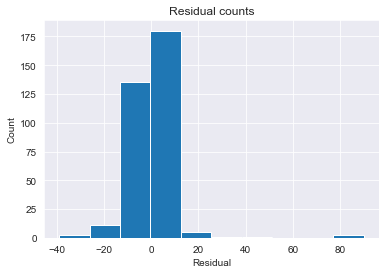

In [65]:
# find predicted values
predicted = regr.predict(X).ravel()
actual = model_df['property']

# Calculate the error, also called the residual.
residual = actual - predicted

# plot
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### Homoscedasticity

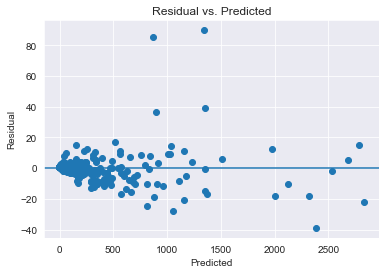

In [66]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

### Transform the data to normalize it

Lets see if this can fix the Homoscedasticity

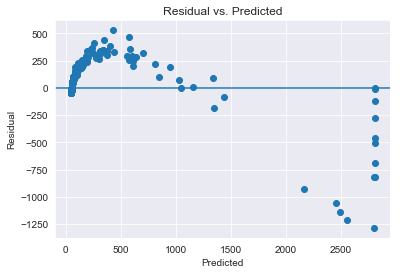

In [67]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression

transformer = QuantileTransformer(output_distribution='normal')
regressor = LinearRegression()
regr = TransformedTargetRegressor(regressor=regressor, transformer=transformer)
regr.fit(x_train, y_train)

# find predicted values
predicted = regr.predict(X).ravel()
actual = model_df['property']

# Calculate the error, also called the residual.
residual = actual - predicted

# plot
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Transforming the data did not seem to help

### Cross Validation Scores

In [97]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, x_train, y_train, cv=10)

array([0.9998149 , 0.99867802, 0.99989343, 0.99967972, 0.99994601,
       0.99503871, 0.99971273, 0.99961877, 0.99965855, 0.99957856])

In [98]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, x_test, y_test, cv=10)

array([0.9992102 , 0.99870968, 0.99869828, 0.99960671, 0.99988725,
       0.99975005, 0.99990918, 0.99941175, 0.99966819, 0.99924175])

In [124]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_train)

from sklearn.metrics import mean_squared_error

print("Train RMSE: %.3f" % mean_squared_error(y_train, y_pred)** 0.5)

Train RMSE: 10.005


In [125]:
regr = linear_model.LinearRegression()
regr.fit(x_test, y_test)
y_pred = regr.predict(x_test)

from sklearn.metrics import mean_squared_error

print("Test RMSE: %.3f" % mean_squared_error(y_test, y_pred)** 0.5)

Test RMSE: 7.160


### Testing the model on the training & test set

My fears of the model possibly overfitting were unwarranted. The model performs similarly well on both the training and the test set.

In [68]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x_train, y_train))


Coefficients: 
 [[1.16933512 1.00445086]]

Intercept: 
 [-0.82617807]

R-squared:
0.9995188982359233


In [69]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x_test, y_test))


Coefficients: 
 [[1.16933512 1.00445086]]

Intercept: 
 [-0.82617807]

R-squared:
0.9997197635058954


In [78]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Write out the model formula.
linear_formula = 'property ~ burglary+violent+larce+populationsq'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=model_df).fit()

### Coefficients

In [79]:
lm.params

Intercept      0.251
burglary       1.001
violent        0.187
larce          1.008
populationsq   0.000
dtype: float64

### P Values

Our PCA'd features are above .005 and dropping them probably wouldn't effect the model.

In [81]:
lm.pvalues

Intercept      0.577
burglary       0.000
violent        0.000
larce          0.000
populationsq   0.001
dtype: float64

### R Squared

In [74]:
lm.rsquared

0.999576403144549

### Drop PC1

Let's drop PC1 and see if it effects our Rsquared value at all

In [110]:
# Write out the model formula.
linear_formula = 'property ~ burglary+violent+larce+populationsq'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=model_df).fit()

lm.rsquared

0.9997865197855922

Doesn't effect it at all!

### Confidence Intervals

From this table, it also looks as if population^2 or violent are also not doing all that much. Let's remove them and see how it looks

In [111]:
lm.conf_int()

,0,1
Intercept,-0.633,1.136
burglary,0.975,1.027
violent,0.165,0.209
larce,1.002,1.013
populationsq,0.000,0.000


In [99]:
# Write out the model formula.
linear_formula = 'property ~ burglary+larce'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=model_df).fit()

print(lm.rsquared)
lm.conf_int()

0.999576403144549


,0,1
Intercept,-1.939,0.490
burglary,1.138,1.181
larce,1.000,1.011


That looks much better

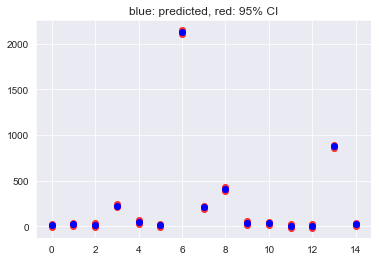

In [113]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r', alpha=.75)
plt.plot(iv_l[0:15], 'o', color='r', alpha=.75)
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

### Lets see how this model works on a different year of crime data

In [101]:
df_14 = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2014.xls')

df_14.columns = ['city', 'population', 'violent', 'murder', 'rape1', 'rape2', 'robbery', 
              'ag_aslt', 'property', 'burglary', 'larce', 'motor_th', 'arson3']

df_14.head(10)

,city,population,violent,murder,rape1,rape2,robbery,ag_aslt,property,burglary,larce,motor_th,arson3
0,Adams Village,1851.000,0.000,0.000,nan,0.000,0.000,0.000,11.000,1.000,10.000,0.000,0.000
1,Addison Town and Village,2568.000,2.000,0.000,nan,0.000,1.000,1.000,49.000,1.000,47.000,1.000,0.000
2,Afton Village4,820.000,0.000,0.000,0.000,nan,0.000,0.000,1.000,0.000,1.000,0.000,0.000
3,Akron Village,2842.000,1.000,0.000,nan,0.000,0.000,1.000,17.000,0.000,17.000,0.000,0.000
4,Albany4,98595.000,802.000,8.000,54.000,nan,237.000,503.000,3888.000,683.000,3083.000,122.000,12.000
5,Albion Village4,5872.000,26.000,0.000,3.000,nan,2.000,21.000,204.000,41.000,159.000,4.000,0.000
6,Alexandria Bay Village4,1107.000,0.000,0.000,0.000,nan,0.000,0.000,7.000,2.000,5.000,0.000,0.000
7,Alfred Village4,4032.000,11.000,1.000,1.000,nan,0.000,9.000,30.000,6.000,24.000,0.000,0.000
8,Altamont Village4,1723.000,1.000,0.000,0.000,nan,0.000,1.000,2.000,2.000,0.000,0.000,0.000
9,Amherst Town4,118860.000,128.000,1.000,16.000,nan,43.000,68.000,2066.000,176.000,1846.000,44.000,2.000


In [93]:
test2014 = df_14[['property','burglary', 'larce']].dropna()

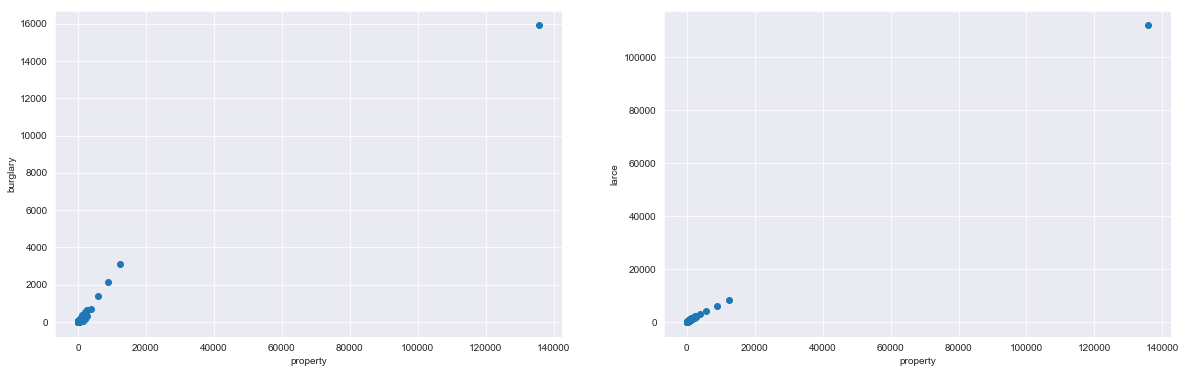

In [94]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.scatter(x='property', y='burglary', data=test2014)
plt.xlabel('property')
plt.ylabel('burglary')
plt.subplot(1,2,2)
plt.scatter(x='property', y='larce', data=test2014)
plt.xlabel('property')
plt.ylabel('larce')
plt.show()

In [109]:
# Instantiate and fit our model.
# regr = linear_model.LinearRegression()
# Y = test2014['property'].values.reshape(-1, 1)
Y14 = test2014['property']
X14 = test2014[['burglary','larce']]
# regr.fit(X, Y)

# Inspect the results.
#print('\nCoefficients: \n', regr.coef_)
#print('\nIntercept: \n', regr.intercept_)
#print('\nR-squared:')
#print(regr.score(X, Y))

test2014['predicted_property'] = lm.predict(X14)

test2014.describe()

,property,burglary,larce,predicted_property
count,368.000,368.000,368.000,368.000
mean,698.361,101.160,562.791,682.324
std,7123.614,856.253,5869.850,6882.987
min,0.000,0.000,0.000,-0.725
25%,25.000,4.000,20.000,24.888
50%,76.000,12.500,60.500,75.787
75%,271.500,39.000,228.500,269.982
max,135747.000,15916.000,112107.000,131150.681


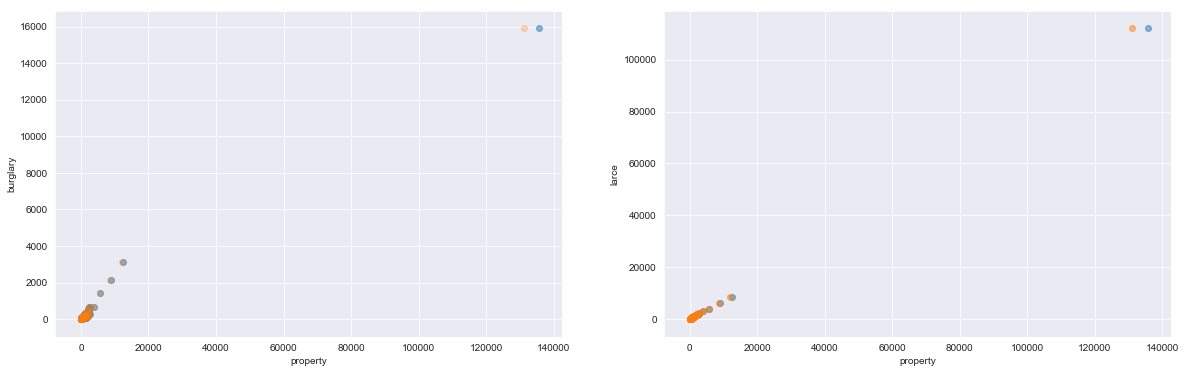

In [115]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.scatter(x='property', y='burglary', data=test2014, alpha=.5)
plt.xlabel('property')
plt.ylabel('burglary')
plt.scatter(x='predicted_property', y='burglary', data=test2014, alpha=.25)
plt.xlabel('property')
plt.ylabel('burglary')
plt.subplot(1,2,2)
plt.scatter(x='property', y='larce', data=test2014, alpha=.5)
plt.xlabel('property')
plt.ylabel('larce')
plt.scatter(x='predicted_property', y='larce', data=test2014, alpha=.5)
plt.xlabel('property')
plt.ylabel('larce')
plt.show()

### Conclusion

Using the features Larceny Theft and Burglary, you can predict the property crime rate of a city with a very high degree of confidence. Any original fears I had of the model overfitting were relieved when testing the model both on the test set and on a different year's crime data. 

As a possible next step, I would consider testing the model on different states other than New York State. Possibly a state with a larger amount of larger & medium sized cities and see if the relationship between the features is consistent.